# Fase 4: Visualización de Datos

### 1 - Gráficos que muestren la comparación entre ingresos previstos, lanzados y realizados para cada categoría.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../datos/tabla_limpia.csv", parse_dates=["fecha recaudacion"])
df.shape

(987202, 16)

In [3]:
df.columns

Index(['Unnamed: 0', 'id organizacion superior', 'organizacion superior',
       'id organizacion', 'organizacion', 'id unidad gestora',
       'unidad gestora', 'categoria economica', 'origen ingreso',
       'tipo ingreso', 'valor previsto', 'valor registrado', 'valor recaudado',
       'porcentaje recaudado', 'fecha recaudacion', 'anio recaudacion'],
      dtype='object')

In [4]:
df_categorias = df.groupby("categoria economica").sum(numeric_only=True).reset_index()[["categoria economica", "valor previsto", "valor registrado", "valor recaudado"]]
df_categorias

,categoria economica,valor previsto,valor registrado,valor recaudado
0,Receitas Correntes,1.314475e+13,5.096879e+12,1.202508e+13
1,Receitas Correntes - intra-orçamentárias,2.694278e+11,0.000000e+00,2.805787e+11
2,Receitas de Capital,1.349986e+13,3.620769e+06,1.200415e+13
3,Receitas de Capital - intra-orçamentárias,1.080841e+10,0.000000e+00,2.141127e+10
4,Sem informação,1.016380e+12,1.792732e+11,3.271665e+11


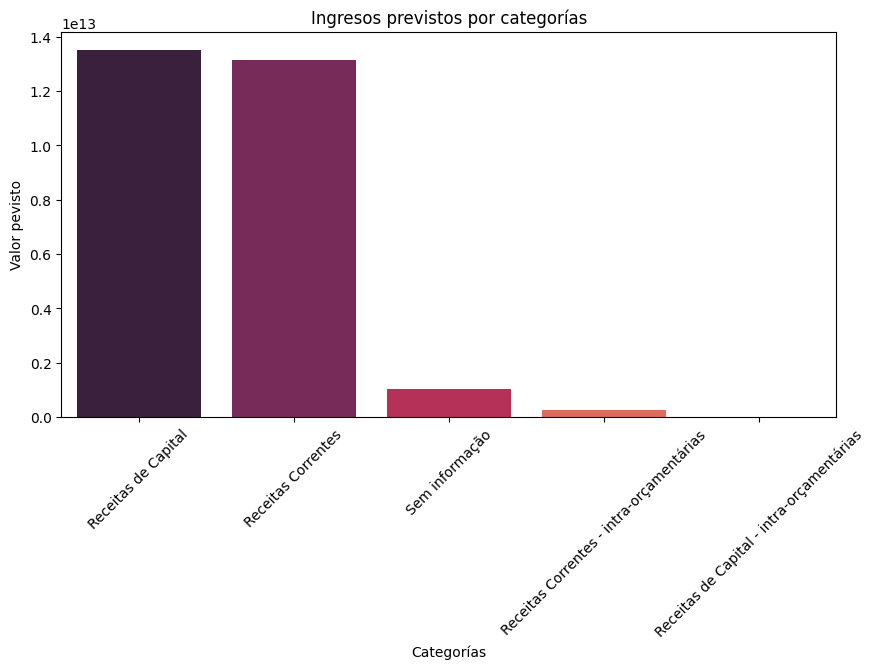

In [5]:
df_categorias_previsto = df_categorias.sort_values(by="valor previsto", ascending=False)
plt.figure(figsize = (10,5))

sns.barplot(x="categoria economica", 
            y="valor previsto",
            hue = "categoria economica",
            data = df_categorias_previsto,
            palette="rocket",
            )

plt.xticks(rotation=45)

plt.title("Ingresos previstos por categorías")
plt.xlabel("Categorías")
plt.ylabel("Valor pevisto")
plt.show()

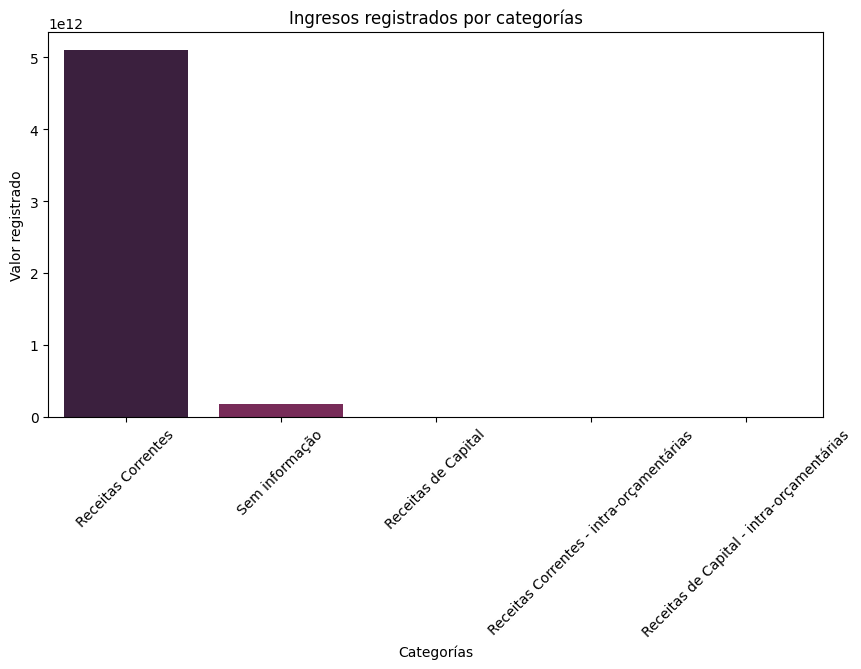

In [6]:
df_categorias_registrado = df_categorias.sort_values(by="valor registrado", ascending=False)

plt.figure(figsize = (10,5))

sns.barplot(x="categoria economica", 
            y="valor registrado",
            data = df_categorias_registrado,
            palette="rocket",
            )

plt.xticks(rotation=45)

plt.title("Ingresos registrados por categorías")
plt.xlabel("Categorías")
plt.ylabel("Valor registrado")
plt.show()

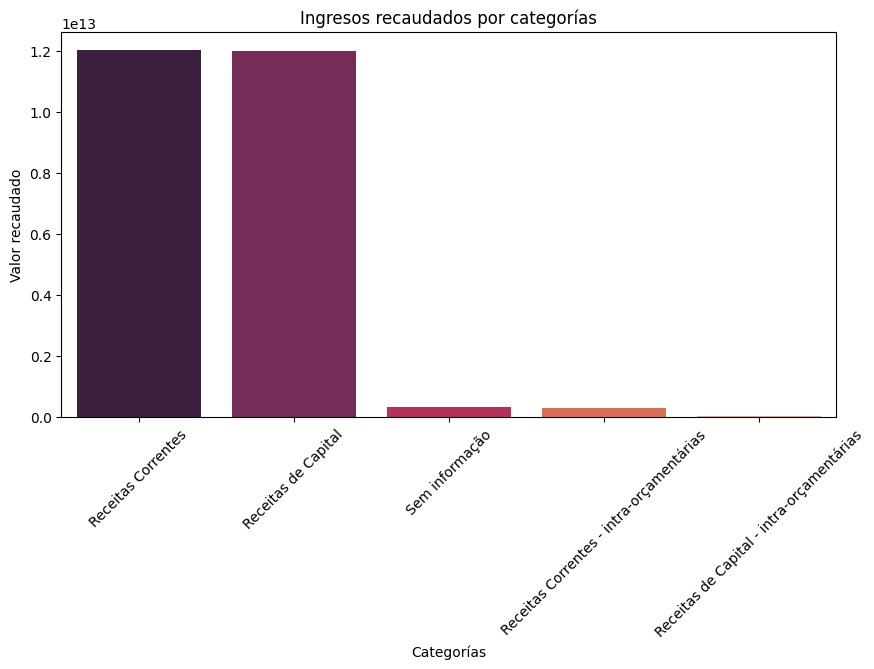

In [7]:
df_categorias_recaudado = df_categorias.sort_values(by="valor recaudado", ascending=False)

plt.figure(figsize = (10,5))

sns.barplot(x="categoria economica", 
            y="valor recaudado",
            data = df_categorias_recaudado,
            palette="rocket",
            )

plt.xticks(rotation=45)

plt.title("Ingresos recaudados por categorías")
plt.xlabel("Categorías")
plt.ylabel("Valor recaudado")
plt.show()

In [8]:
df_categorias_recaudado = df_categorias.sort_values(by="valor recaudado", ascending=False)
df_categorias_recaudado

,categoria economica,valor previsto,valor registrado,valor recaudado
0,Receitas Correntes,1.314475e+13,5.096879e+12,1.202508e+13
2,Receitas de Capital,1.349986e+13,3.620769e+06,1.200415e+13
4,Sem informação,1.016380e+12,1.792732e+11,3.271665e+11
1,Receitas Correntes - intra-orçamentárias,2.694278e+11,0.000000e+00,2.805787e+11
3,Receitas de Capital - intra-orçamentárias,1.080841e+10,0.000000e+00,2.141127e+10


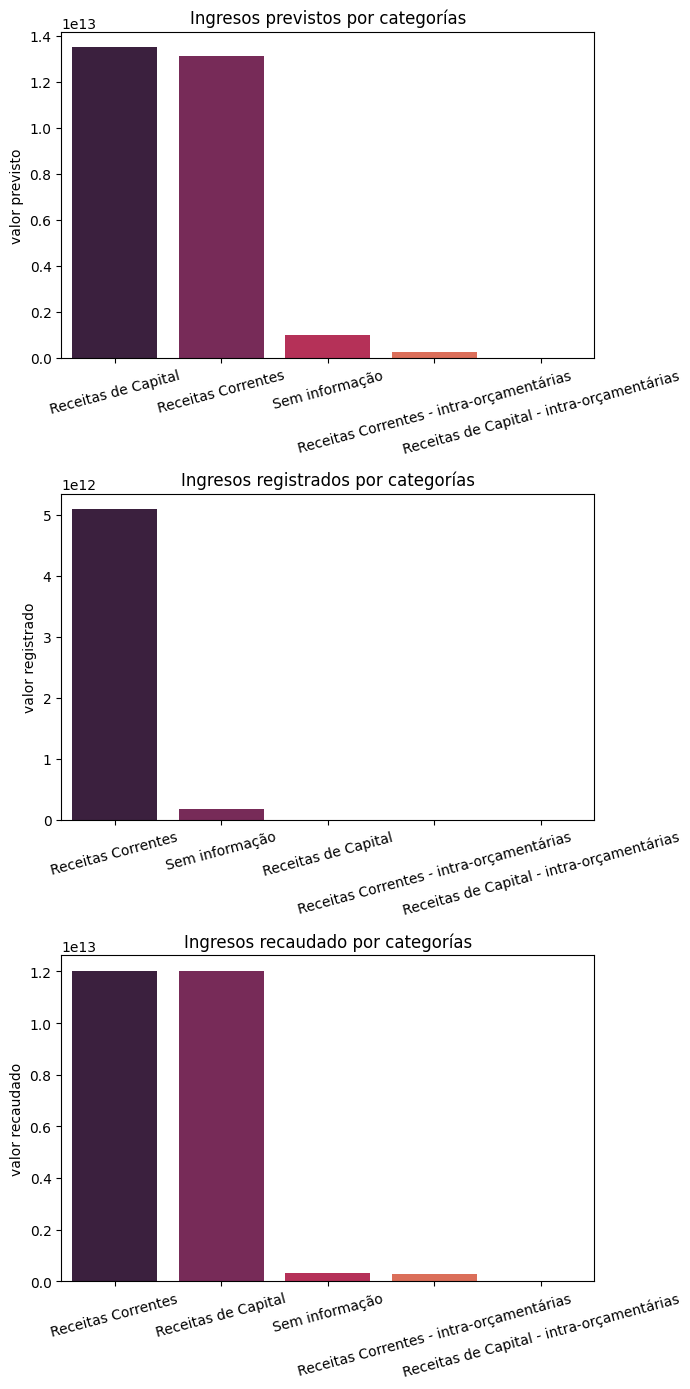

In [9]:
fig, axes = plt.subplots(3,1, figsize=(7,14))

df_categorias_previsto = df_categorias.sort_values(by="valor previsto", ascending=False)
sns.barplot(x="categoria economica", y="valor previsto", data = df_categorias_previsto, palette="rocket", ax=axes[0])

df_categorias_registrado = df_categorias.sort_values(by="valor registrado", ascending=False)
sns.barplot(x="categoria economica", y="valor registrado", data = df_categorias_registrado, palette="rocket", ax=axes[1])

df_categorias_recaudado = df_categorias.sort_values(by="valor recaudado", ascending=False)
sns.barplot(x="categoria economica", y="valor recaudado", data = df_categorias_recaudado, palette="rocket", ax=axes[2])



axes[0].set_title("Ingresos previstos por categorías")
axes[1].set_title("Ingresos registrados por categorías")
axes[2].set_title("Ingresos recaudado por categorías")

axes[0].set_xlabel("")
axes[0].set_ylabel("valor previsto")
axes[1].set_xlabel("")
axes[1].set_ylabel("valor registrado")
axes[2].set_xlabel("")
axes[2].set_ylabel("valor recaudado")


axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=15)
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=15)

plt.tight_layout()  # Ajustar el layout para que no se solapen
plt.show()

### Evolución temporal de los ingresos realizados y previstos.

In [10]:
df_anios = df.groupby("anio recaudacion").sum(numeric_only=True)[["valor previsto","valor recaudado"]].reset_index()
df_anios[["valor previsto","valor recaudado"]] = df_anios[["valor previsto","valor recaudado"]] / 1000000000000 # pasamos a billones
df_anios

,anio recaudacion,valor previsto,valor recaudado
0,2013.0,2.128724,1.663430
1,2014.0,2.333104,2.211514
2,2015.0,2.871164,2.634219
3,2016.0,2.910191,2.787181
4,2017.0,3.400684,2.476073
5,2018.0,3.476635,2.865977
6,2019.0,3.249178,2.880424
7,2020.0,3.528192,3.460501
8,2021.0,4.043359,3.679059


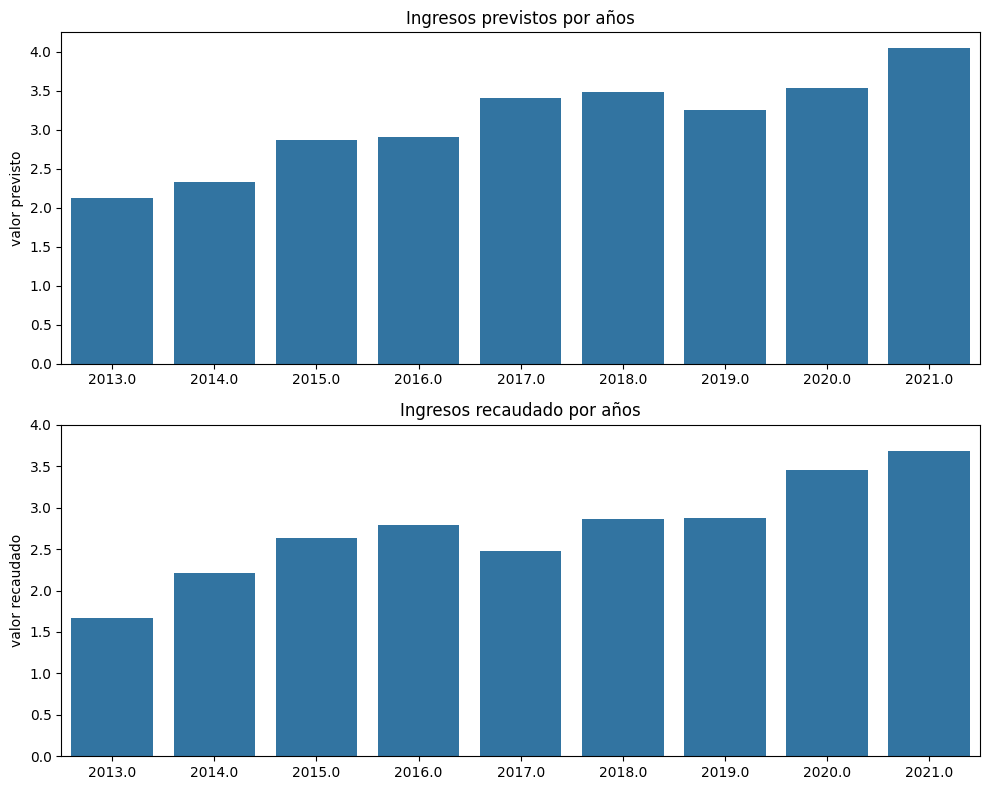

In [11]:
fig, axes = plt.subplots(2,1, figsize=(10,8))

sns.barplot(x="anio recaudacion", y="valor previsto", data = df_anios, ax=axes[0])
sns.barplot(x="anio recaudacion", y="valor recaudado", data = df_anios, ax=axes[1])



axes[0].set_title("Ingresos previstos por años")
axes[1].set_title("Ingresos recaudado por años")

axes[0].set_xlabel("")
axes[0].set_ylabel("valor previsto")
axes[1].set_xlabel("")
axes[1].set_ylabel("valor recaudado")

axes[1].set_ylim(0,4)

plt.tight_layout()  # Ajustar el layout para que no se solapen
plt.show()

RECUERDA: el eje y su unidad es el billón.

Haciendo esta gráfica me he dao cuenta de que igual es más fácil de ver la comparación si las pusieramos una junto a otra e hicieramos un hue por el tipo de valor, para eso hay que hacer algunos arreglos.

In [12]:
df_melt = df_anios.melt(id_vars="anio recaudacion", value_vars=["valor previsto", "valor recaudado"], var_name="tipo de valor", value_name="monto")
df_melt

,anio recaudacion,tipo de valor,monto
0,2013.0,valor previsto,2.128724
1,2014.0,valor previsto,2.333104
2,2015.0,valor previsto,2.871164
3,2016.0,valor previsto,2.910191
4,2017.0,valor previsto,3.400684
5,2018.0,valor previsto,3.476635
6,2019.0,valor previsto,3.249178
7,2020.0,valor previsto,3.528192
8,2021.0,valor previsto,4.043359
9,2013.0,valor recaudado,1.663430


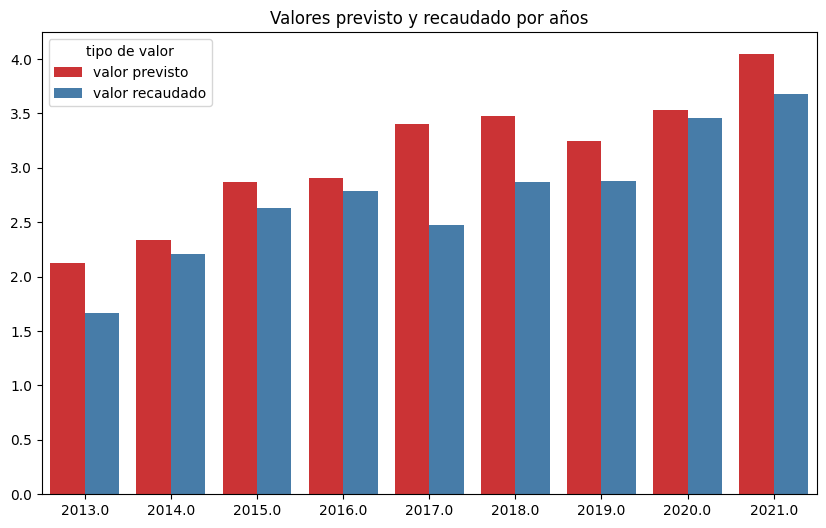

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="anio recaudacion", y="monto", hue="tipo de valor", palette="Set1", data=df_melt)

plt.title("Valores previsto y recaudado por años")
plt.xlabel("")
plt.ylabel("")
plt.show()


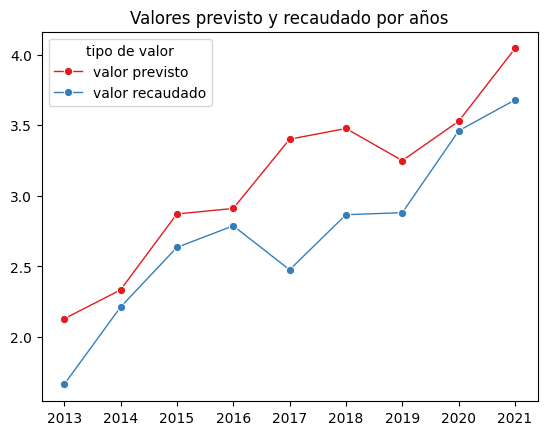

In [14]:
sns.lineplot(x="anio recaudacion",
            y="monto",
            hue = "tipo de valor",
            data= df_melt,
            marker = "o", 
            linewidth = 1, 
            palette="Set1",  
            errorbar = None, 
            )

plt.title("Valores previsto y recaudado por años")
plt.xlabel("")
plt.ylabel("")
plt.show()

Aquí se puede observar gráficamente como siempre se preve una recaudación mayor que la que realmente se obtiene, como se inferió en el EDA. Se ve como en los años 2014,2015,2016 si que se acerca más pero durante el 2017,2018 y 2019 hay una grandísima diferencia hasta 2020 que se acerca d nuevo bastante.

Podría hacer la gráfica por meses pero como se vió en la fase anterior, no arroja ninguna información útil, mas que diciembre es el mes donde más se recauda.

### Evaluar la dispersión de las diferencias entre los valores previstos y realizados en diferentes categorías.

In [15]:
df_categorias = df.groupby("categoria economica").sum(numeric_only=True).reset_index()[["categoria economica", "valor previsto", "valor registrado", "valor recaudado"]]
df_categorias[["valor previsto", "valor registrado", "valor recaudado"]] = df_categorias[["valor previsto", "valor registrado", "valor recaudado"]] /1000000000000
list_cat= ["Receitas Correntes", "Receitas de Capital"]
df_cat_receitas = df_categorias[df_categorias["categoria economica"].isin(list_cat)]
df_cat_receitas['diferencia'] = df_cat_receitas['valor recaudado'] - df_cat_receitas['valor previsto']
df_cat_receitas

,categoria economica,valor previsto,valor registrado,valor recaudado,diferencia
0,Receitas Correntes,13.144754,5.096879,12.025076,-1.119678
2,Receitas de Capital,13.499860,0.000004,12.004146,-1.495714


In [16]:
fil1 = df["valor previsto"].notnull()
fil2 = df["valor recaudado"].notnull()
df_box = df[fil1 & fil2][["categoria economica", "valor previsto", "valor recaudado"]]
df_box["diferencia"] = df_box["valor recaudado"] -df_box["valor previsto"]
df_box

,categoria economica,valor previsto,valor recaudado,diferencia
0,Receitas Correntes,0.0,1297.13,1297.13
1,Receitas Correntes,0.0,26666621.42,26666621.42
2,Receitas Correntes,0.0,301251.13,301251.13
3,Receitas Correntes,0.0,1855.58,1855.58
4,Receitas Correntes,0.0,52140.68,52140.68
...,...,...,...,...
987197,Receitas de Capital,10247198.0,0.00,-10247198.00
987198,Receitas de Capital,16940891.0,0.00,-16940891.00
987199,Receitas Correntes,200000.0,0.00,-200000.00
987200,Receitas Correntes,0.0,1000000.00,1000000.00


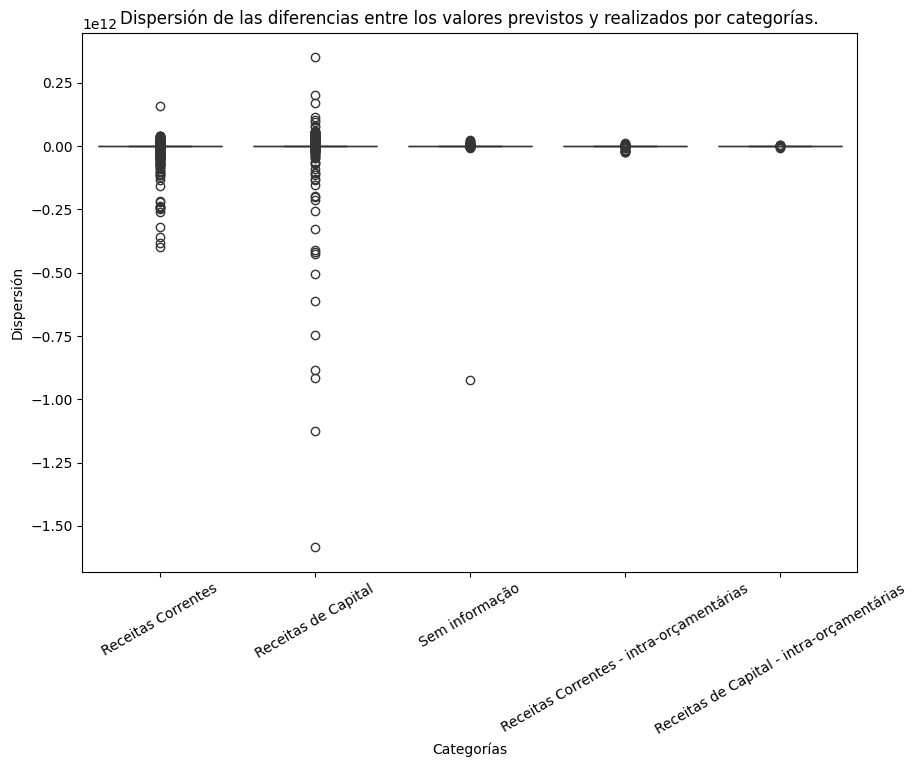

In [17]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "categoria economica",
            y = "diferencia",
            data = df_box, 
            palette = 'viridis',
            )


plt.xticks(rotation = 30)
plt.title("Dispersión de las diferencias entre los valores previstos y realizados por categorías.")
plt.xlabel("Categorías")
plt.ylabel("Dispersión")

plt.show()

Las diferencias son muy distantes unas de otras teniendo unos outlayers tan alejados que no se entiende la gráfica correcamente. Pero es bastante fácil ver como Receitas de Capital tiene una gran cantidad de outlayers tanto positivos como negativos que indican un claro problema a la hora de calcular el valor previsto, ya que cuado llega el valor recaudado hay grandes diferencias entre ambos. Seguido está las Receitas Corrientes para la cual podemos ver más outlayer negativos que positivos coincidiendo estas gráficas y corroborando las conclusiones obtenidas durante el EDA.